# 4장 : 통계학 및 선형 대수

# 기본적인 통계학

In [4]:
%matplotlib inline
import numpy as np
from scipy.stats import scoreatpercentile
import pandas as pd

data = pd.read_csv("co2.csv", index_col=0, parse_dates=True)

co2 = np.array(data.co2)

print("The statistical valus for amounts of co2 in atmosphere : \n")
print("Max method : ", co2.max())
print("Max function : ", np.max(co2))

print("Min method : ", co2.min())
print("Min function : ", np.min(co2))

print("Mean method : ", co2.mean())
print("Mean function : ", np.mean(co2))

print("Std method : ", co2.std())
print("Std function : ", np.std(co2))

print("Median : ", np.median(co2))
print("Score at percentile 50 : ", scoreatpercentile(co2, 50))

The statistical valus for amounts of co2 in atmosphere : 

Max method :  366.84
Max function :  366.84
Min method :  313.18
Min function :  313.18
Mean method :  337.0535256410256
Mean function :  337.0535256410256
Std method :  14.950221626197369
Std function :  14.950221626197369
Median :  335.17
Score at percentile 50 :  335.17


# 선형 대수

## 역행렬 구하기

In [5]:
A = np.mat("2 4 6;4 2 6;10 -4 18")

In [6]:
print("A\n", A)

A
 [[ 2  4  6]
 [ 4  2  6]
 [10 -4 18]]


In [7]:
inverse = np.linalg.inv(A)
print("inverse of A\n", inverse)

inverse of A
 [[-0.41666667  0.66666667 -0.08333333]
 [ 0.08333333  0.16666667 -0.08333333]
 [ 0.25       -0.33333333  0.08333333]]


In [8]:
print("Check\n", A * inverse)

Check
 [[ 1.00000000e+00 -2.22044605e-16  0.00000000e+00]
 [ 5.55111512e-17  1.00000000e+00  0.00000000e+00]
 [ 3.88578059e-16 -4.44089210e-16  1.00000000e+00]]


In [9]:
print("Error\n", A * inverse - np.eye(3))

Error
 [[ 0.00000000e+00 -2.22044605e-16  0.00000000e+00]
 [ 5.55111512e-17 -4.44089210e-16  0.00000000e+00]
 [ 3.88578059e-16 -4.44089210e-16  0.00000000e+00]]


## 선형 시스템 해석하기

In [10]:
A = np.mat("1 -2 1;0 2 -8;-4 5 9")
print("A\n", A)
b = np.array([0, 8, -9])
print("b\n", b)

A
 [[ 1 -2  1]
 [ 0  2 -8]
 [-4  5  9]]
b
 [ 0  8 -9]


In [11]:
x = np.linalg.solve(A, b)
print("Solution", x)

Solution [29. 16.  3.]


In [12]:
print("Check\n", np.dot(A , x))

Check
 [[ 0.  8. -9.]]


## 고유값과 고유벡터 구하기

In [13]:
A = np.mat("3 -2;1 0")
print("A\n", A)

print("Eigenvalues", np.linalg.eigvals(A))

eigenvalues, eigenvectors = np.linalg.eig(A)
print("First tuple of eig", eigenvalues)
print("Second tuple of eig\n", eigenvectors)

for i in range(len(eigenvalues)):
   print("Left", np.dot(A, eigenvectors[:,i]))
   print("Right", eigenvalues[i] * eigenvectors[:,i])

A
 [[ 3 -2]
 [ 1  0]]
Eigenvalues [2. 1.]
First tuple of eig [2. 1.]
Second tuple of eig
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]
Left [[1.78885438]
 [0.89442719]]
Right [[1.78885438]
 [0.89442719]]
Left [[0.70710678]
 [0.70710678]]
Right [[0.70710678]
 [0.70710678]]


# 무작위 수

## 이항 분포

0 9


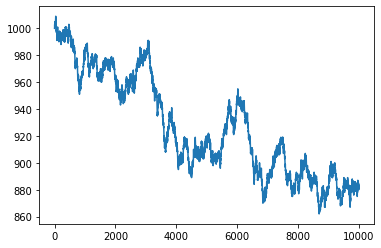

In [14]:
import numpy as np
from matplotlib.pyplot import plot, show

cash = np.zeros(10000)
cash[0] = 1000
outcome = np.random.binomial(9, 0.5, size=len(cash))

for i in range(1, len(cash)):

   if outcome[i] < 5:
      cash[i] = cash[i - 1] - 1
   elif outcome[i] < 10:
      cash[i] = cash[i - 1] + 1
   else:
      raise AssertionError("Unexpected outcome " + outcome)

print(outcome.min(), outcome.max())

plot(np.arange(len(cash)), cash)
show()

## 정규 분포

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


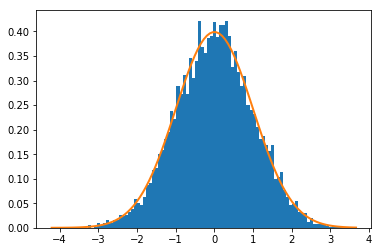

In [33]:
import numpy as np
import matplotlib.pyplot as plt

N=10000

normal_values = np.random.normal(size=N)
dummy, bins, dummy = plt.hist(normal_values, int(np.sqrt(N)), normed=True, lw=1)
sigma = 1
mu = 0
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),lw=2)
plt.show()

## SciPy로 정규성 검증

In [55]:
import numpy as np
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest

flutrends = np.loadtxt("goog_flutrends.csv", delimiter=',', usecols=(1,), skiprows=1, converters = {1: lambda s: float(s or 0)}, unpack=True)
N = len(flutrends)
normal_values = np.random.normal(size=N) # 정규분포로 만든 값들
zero_values = np.zeros(N)

# 샤피로 검증 : p-value가 0.05보다 클때 정규성을 띤다
#                              통계량               p-value
# Normal Values Shapiro (0.9985182285308838, 0.9054849147796631
# 표본수(n) 2000(5000) 미만인 데이터 셋에 적합
print("<샤피로 검증>")
print("Normal Values Shapiro", shapiro(normal_values)) # 정규분포로 만든 값들이기 때문에 정규분포의 형태를 띤다
#print("Zeroes Shapiro", shapiro(zero_values))
print("Flu Shapiro", shapiro(flutrends))

print('='*138)
# 앤더슨 달링 검증 : 통계량이 유의 수준에서의 임계값보다 작으면 정규성을 띤다.
# 표본수(n) 5만개 이상인 데이터 셋에 가능
print("<앤더슨 달링 검증>")
# 통계량(statistic), 임계량(critical_values)
# 유의 수준(significance_level) -> 표본에 의한 가설의 검정에서 가설을 잘못하여 기각하는 확률적인 정도
print("Normal Values Anderson", anderson(normal_values))
# Normal Values Anderson AndersonResult(statistic=0.2177381625746193, 
#                                       critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), 
#                                       significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#print("Zeroes Anderson", anderson(zero_values))
print("Flu Anderson", anderson(flutrends))
# Flu Anderson AndersonResult(statistic=8.258614154768793, 
#                             critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), 
#                             significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


print('='*138)
# 피어슨 검증 : 카이제곱 검정
# 표본 크기가 1000 이하
# p값이 0.5보다 작으면 정규성을 띤다
print("<피어슨 검증>")
print("Normal Values normaltest", normaltest(normal_values))
#print("Zeroes normaltest", normaltest(zero_values))
print("Flu normaltest", normaltest(flutrends))

<샤피로 검증>
Normal Values Shapiro (0.9979694485664368, 0.7089247703552246)
Flu Shapiro (0.9351992011070251, 2.2946666759787607e-15)
<앤더슨 달링 검증>
Normal Values Anderson AndersonResult(statistic=0.17547008773522066, critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Flu Anderson AndersonResult(statistic=8.258614154768793, critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
<피어슨 검증>
Normal Values normaltest NormaltestResult(statistic=1.145129626050636, pvalue=0.5640768301873131)
Flu normaltest NormaltestResult(statistic=99.64373336356954, pvalue=2.304826411536872e-22)


442.0


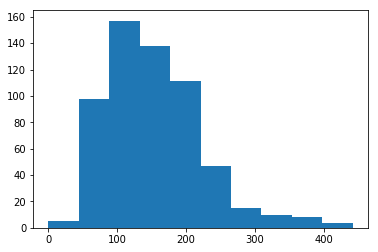

In [56]:
type(flutrends)
print(flutrends.max())
plt.hist(flutrends)
# plt.boxplot(flutrends)
plt.show()

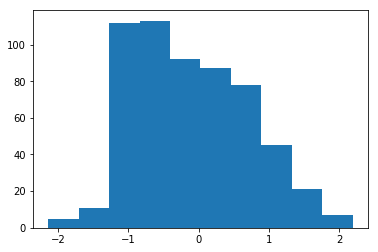

In [57]:
# 표준화

from sklearn.preprocessing import StandardScaler


flutrends = flutrends.reshape(-1, 1)           
data_stand_skl = StandardScaler().fit_transform(flutrends)
data_stand_skl
data_stand_skl_zoomin =data_stand_skl[data_stand_skl<2.2]
# print(data_stand_skl_zoomin)
plt.hist(data_stand_skl_zoomin)
plt.show()

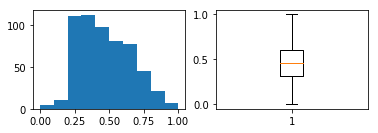

Flu minmax Shapiro (0.9749319553375244, 2.5839113959591486e-08)
--------------------------------------------------
Flu minmax Anderson AndersonResult(statistic=4.639932086036197, critical_values=array([0.572, 0.651, 0.782, 0.912, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
--------------------------------------------------
Flu minmax Normal NormaltestResult(statistic=19.622779263970703, pvalue=5.4823609199221525e-05)
--------------------------------------------------


In [62]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
flutrends = data_stand_skl_zoomin.reshape(-1, 1) # -1은 1차원을 2차원으로 바꿀 때 사용한다
data_minmax_skl = MinMaxScaler().fit_transform(flutrends)
# print('sklearn minmax data:\n', data_minmax_skl)
plt.subplot(2, 2, 1)
plt.hist(data_minmax_skl)
plt.subplot(2, 2, 2)
plt.boxplot(data_minmax_skl)
plt.show()

data_minmax_skl = data_minmax_skl.reshape(-1, )
print("Flu minmax Shapiro", shapiro(data_minmax_skl))
print('-'*50)
print("Flu minmax Anderson", anderson(data_minmax_skl))
print('-'*50)
print("Flu minmax Normal", normaltest(data_minmax_skl))
print('-'*50)

# Numpy 마스킹 배열

In [ ]:
import numpy
import scipy
import matplotlib.pyplot as plt

face = scipy.misc.face()

random_mask = numpy.random.randint(0, 2, size=face.shape)

plt.subplot(221)
plt.title("Original")
plt.imshow(face)
plt.axis('off')

masked_array = numpy.ma.array(face, mask=random_mask)

plt.subplot(222)
plt.title("Masked")
plt.imshow(masked_array)
plt.axis('off')

plt.subplot(223)
plt.title("Log")
plt.imshow(numpy.ma.log(face).astype("float32"))
plt.axis('off')


plt.subplot(224)
plt.title("Log Masked")
plt.imshow(numpy.ma.log(masked_array).astype("float32"))
plt.axis('off')

plt.show()

# 음수와 극단적인 값 제거하기

In [ ]:
import numpy as np
from datetime import date
import sys
import matplotlib.pyplot as plt

salary = np.loadtxt("MLB2008.csv", delimiter=',', usecols=(1,), skiprows=1, unpack=True)
triples = np.arange(0, len(salary), 3)
print("Triples", triples[:10], "...")

signs = np.ones(len(salary))
print("Signs", signs[:10], "...")

signs[triples] = -1
print("Signs", signs[:10], "...")

ma_log = np.ma.log(salary * signs)
print("Masked logs", ma_log[:10], "...")

dev = salary.std()
avg = salary.mean()
inside = np.ma.masked_outside(salary, avg - dev, avg + dev)
print("Inside", inside[:10], "...")

plt.subplot(311)
plt.title("Original")
plt.plot(salary)

plt.subplot(312)
plt.title("Log Masked")
plt.plot(np.exp(ma_log))

plt.subplot(313)
plt.title("Not Extreme")
plt.plot(inside)

plt.subplots_adjust(hspace=.9)

plt.show()